#Importing libraries

In [ ]:
from math import sqrt
import numpy as np

#Step 1 : Finding Euclidean Distance

In [ ]:
def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2            #(x1-x2)**2+(y1-y2)**2
    return sqrt(distance)

#Step 2 : Finding the Nearest Neighbor

In [ ]:
def Get_Neighbors(train, test_row, num_neighbors):
 distances = list()
 for train_row in train:
  dist = Euclidean_distance(test_row, train_row)
  distances.append((train_row, dist))
 distances.sort(key=lambda tup: tup[1])
 neighbors = list()
 for i in range(num_neighbors):
  neighbors.append(distances[i][0])
 return neighbors

#Step 3: Predict Classification(class)

In [ ]:
def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

#Step 04: FInding accuracy

In [ ]:
def Evaluate(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_true)
    return acc

#let's check it on our iris dataset that we used in knn with library implementation

In [55]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

loading dataset

In [56]:
iris = load_iris()

Finding the columns we have in our dataset

In [57]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Initializing the variables

In [58]:
y_iris = iris.target
data = iris.data

Inserting data in the defined variables

In [59]:
data = np.insert(data, 4, y_iris, axis =1)
 
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

Splitting data into two parts training and testing data

In [60]:
train, test = train_test_split(data, test_size = 0.25)

Prediction for all the classes using our predict_classification function:

In [61]:
y_pred = []
y_true = test[:, -1]
for i in test:
    prediction = predict_classification(train, i, 10)
   
    y_pred.append(prediction)

Accuracy Testing:

In [62]:
Evaluate(y_true, y_pred)

0.9736842105263158

#Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)
cm

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 15]])

Text(69.0, 0.5, 'Truth')

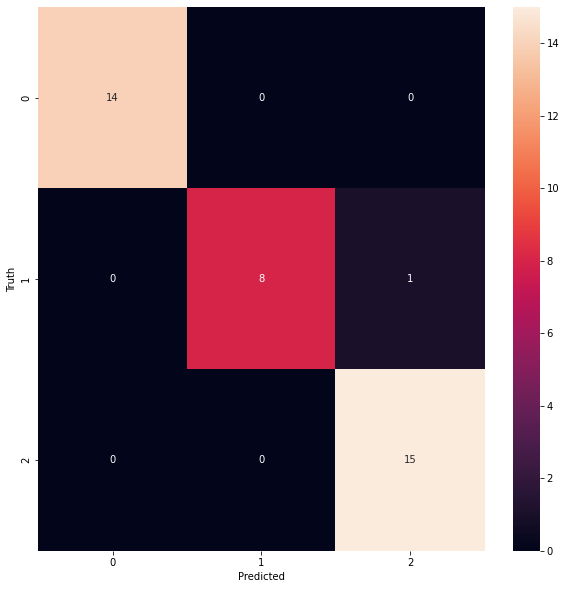

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")